

# Introduction


While many probability distributions are nonzero over the range $(0, \infty)$, for numerical purposes we often truncate distributions. How do quantities like the entropy and variance behave when we truncate the distributions?

We partially answer this question with the following theorem:


# Theorem


Let P(x) be a poisson distribution with parameter $\left\langle x \right\rangle$. If we truncate this poisson distribution at index t (inclusive), where $t \geq \left\langle x \right\rangle$ and $P(t) \leq 1/e \approx 0.368$, and do not renormalize the truncated distribution, then the entropy of the actual distribution and the non normalized truncated distribution obey the following inequalities:

\begin{equation}
H(x)_{truncated} \leq H(x)_{actual} \leq H(x)_{truncated} + E_{H}(t)
\end{equation}

Where $E_{H}(t)$ is an error estimate given by:

\begin{equation}
E_{H}(t) = -P(t)\big[log(P(t)) \frac{A}{1 - A} + log(A)\frac{A}{(1 - A)^2}\big]
\end{equation}

Where $A = \frac{\left\langle x \right\rangle}{t + 1}$.

Therefore if the choice of cutoff lies much farther than the average, we have $A, P(t) \rightarrow 0$ and thus the error in our approximation for the entropy is very small. More precisely, approximating $P(t) = \frac{\left\langle x \right\rangle^t e^{-\left\langle x \right\rangle}}{t!} \approx \frac{\left\langle x \right\rangle}{t}$ for large t, the error in the entropy  $E_{H}(t) \propto \frac{\left\langle x \right\rangle ^{1.5}}{t^{1.5}}$ (using the approximation that $x ln x \approx -(1 - x)\sqrt{x}$).


# Implications

Note the proof for this theorem only requires that the tail of the distribution decays faster than exponentially, which we suspect to be a general property of many distributions. It can thus be rewritten for more general distributions which decay faster than exponentially.

This suggests the entropy is well approximated if the probability distribution decays quickly and there is very negligible probability in the truncated region. This matches our intuition. 

However, if this is not true, then the error cannot be guaranteed to be small. For example, if a small amount of probability $P_{lost}$ is in in the truncated region, but spread evenly over $N$ points, then the contribution to the entropy from this portion lost in truncation is:

\begin{equation}
H(x)_{lost} = P_{lost}\big[log(P_{lost}) + log(N)\big]
\end{equation}

Which if N is large, can be arbitrarily large.

This should not be surprising: Variances are similar, as the missing portion of the pdf can have probability distributed in a way that significantly affects the total variance. Interestingly, distributions that maximize variance and that maximize entropy are very different: entropy prefers an even spread, while maximum variance prefers to saturate the endpoints of the space.


# Proof


For a Poisson distribution:

\begin{equation}
P_{i + 1}/P_i = \left\langle x \right\rangle/(i+1)
\end{equation}

This implies for any indexes i, t where $i > t$:

\begin{equation}
P_{i} \leq \bigg( \frac{\left\langle x \right\rangle}{(i+1)}\bigg)^{i - t} P(t)
\end{equation}

Colloquially, we are using the property that poisson distributions will decay faster than exponential distributions at some point. We thus consider three distributions: $P(x)_{actual}$, the actual poisson distribution, $P(x)_{truncated}$, the poisson distribution truncated at index t, and $P(x)_{approx}$, the same as the truncated distribution, but an exponential tail has been appended. Note that $\sum_{x = 0}^{\infty}P(x)_{approx} > 1 > \sum_{x = 0}^{t}P(x)_{truncated}$ so they are not real distributions.

Our three distributions can be represented graphically for some average and truncation parameter:

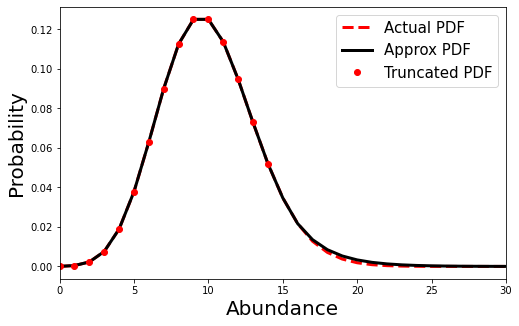

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

##We define the total size of our finite poisson distribution
##Along with it's average, and an index where we further truncate it
arrsize = 100
average = 10
truncateind = 15

##Functions to generate a poisson distribution and to truncate it with our procedure
def poissongen2(average, size):
    dist = poisson(average)
    pdf = np.arange(0, size)
    return dist.pmf(pdf)

def truncate(pdf, size, truncate_index, average):
    modpdf = np.copy(pdf)
    ptruncval = pdf[truncate_index]
    growthexp = average/(truncate_index + 1.0)
    for cyc in np.arange(truncate_index + 1, size):
        #print ( modpdf[cyc])
        modpdf[cyc] = ptruncval*growthexp**(cyc - truncate_index)
        #print ( modpdf[cyc], ' x')
    return modpdf

pdf = poissongen2(average, arrsize)
approxpdf = truncate(pdf, arrsize, truncateind, average)

fig, ax = plt.subplots(figsize=[8, 5])
plt.plot(pdf, 'r--', lw=3, label = 'Actual PDF')
plt.plot(approxpdf, 'k-', lw=3, label = 'Approx PDF')
plt.plot(pdf[0:truncateind], 'ro', lw=3, label = 'Truncated PDF')

plt.xlim((0, 30.0))
plt.xlabel("Abundance", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.legend(loc='best', fontsize =15)
plt.show()

The entropy is given by:

\begin{equation}
H(x) = -\sum_{x = 0}^{\infty} P(x) log (P(x))
\end{equation}

Since every term in this sum is positive (since $P(x)\leq 1, -log(P(x)) \geq 0$), the actual poisson entropy will always be larger than the entropy of the truncated distribution since the truncated distribution entropy is identical but lacks terms above index t.

Similarly, note whenever $1/e> P_1 > P_2$, we have $-P_1 log(P_1) \geq -P_2 log(P_2)$. Since the probability distribution $P(x)_{approx}$ has larger values than $P(x)_{actual}$, it will have a larger entropy. Therefore:

\begin{equation}
H(x)_{truncated} \leq H(x)_{actual} \leq H(x)_{approx}
\end{equation}

\begin{equation}
H(x)_{approx} = \sum_{x = 0}^{x = t} P(x)_{truncated} log(P(x)_{truncated}) + \sum_{x = t + 1}^{\infty} P(x)_{approx} log(P(x)_{approx}) = H(x)_{truncated} + E_{H}(t)
\end{equation}

By using several nice properties of geometric sums which arise from our particular approximation, we find:

\begin{equation}
E_{H}(t) = -P(t)\big[log(P(t)) \frac{A}{1 - A} + log(A)\frac{A}{(1 - A)^2}\big]
\end{equation}

Where $A = \frac{\left\langle x \right\rangle}{t + 1}$.

Numerically, we can verify this with our earlier distributions:

In [21]:
##Calculates the entropy of a 1D distribution 
def mentrpy(marglist, span):
    ment = 0
    for cyc in range(span):
        if marglist[cyc] > 0:
            ment += -marglist[cyc]*np.log2(marglist[cyc])
    return ment

#Our analytical expression for E_H
def errorent(pdf, truncate_index, average):
    growthexp = average/(truncate_index + 1.0)
    ptruncval = pdf[truncate_index]
    return -ptruncval*(np.log2(ptruncval) * growthexp/(1 - growthexp) + np.log2(growthexp)*growthexp/(1 - growthexp)**2)

##Entropies
entactual = mentrpy(pdf, arrsize)
entapprox = mentrpy(approxpdf, arrsize)
enttrunc = mentrpy(approxpdf, truncateind+1)

##Our expression for the difference entapprox - enttrunc
enterror = errorent(pdf, truncateind, average)

print ("We truncate at index ", truncateind, " corresponding to P = ", pdf[truncateind])
print ("The actual entropy is ", entactual)
print ("The approximate entropy is ", entapprox)
print ("The truncated entropy is ", enttrunc)
print ("Our expression predicts the error", enterror, " yielding an approximate entropy of ", enttrunc + enterror)

We truncate at index  15  corresponding to P =  0.034718069630684245
The actual entropy is  3.695333411304838
The approximate entropy is  3.7651207459476996
The truncated entropy is  3.379960726426185
Our expression predicts the error 0.3851600195215165  yielding an approximate entropy of  3.7651207459477014


# Conclusion

We have proved that the entropy of a truncated poisson distribution (or any truncated distribution which has a tail that decreases faster than exponentially) can be shown to be smaller than the actual entropy by an error term that is proportional to a function of the probability at the point of truncation and a parameter that measures how fast the exponential decay is. This shows that if the probability distribution contains a tail that vanishes quickly and is very small, it's contribution to the entropy can be neglected.

For future work, we can generalize this to the multivariate case for distributions that similarly decay quicker than exponentially beyond some cutoff.

# Entropy of Binomial Approximations to a Poisson Distribution

Above is a general case. For a more specific and relevant case, we plot the entropy of the Poisson distribution truncated at t = 1 (making it a pseudo binomial variable, as it is not normalized) and the entropy of the non truncated Poisson distribution. We also compare the entropy of the actual binomial variable.

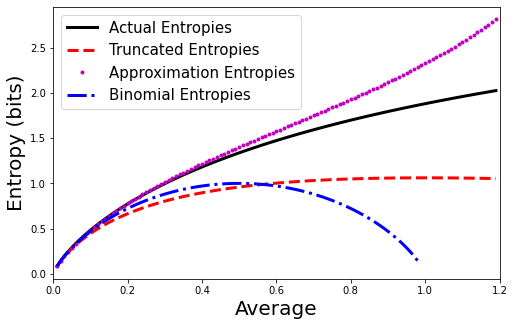

In [31]:
##Array parameters
arrsize = 200
truncateind = 1

##Sample averages for the poisson type distributions and it's entropy calculation
averages = np.arange(0.01, 1.2, 0.01)
pts = len(averages)
actual_entropies = np.zeros(pts)
truncated_entropies = np.zeros(pts)
approx_entropies = np.zeros(pts)

for cyc in range(pts):
    pdf = poissongen2(averages[cyc], arrsize)
    approxpdf = truncate(pdf, arrsize, truncateind, averages[cyc])
    
    actual_entropies[cyc] = mentrpy(pdf, arrsize)
    truncated_entropies[cyc] = mentrpy(pdf, truncateind+1)
    approx_entropies[cyc] = mentrpy(approxpdf, arrsize)

##Sample averages for the binomial and it's entropy calculation
averages2 = np.arange(0.01, 0.99, 0.01)
pts2 = len(averages2)
binomial_entropies = np.zeros(pts2)

for cyc2 in range(pts2):
    binomialpdf = np.array([1 - averages2[cyc2], averages2[cyc2]])
    binomial_entropies[cyc2] = mentrpy(binomialpdf, 2)

##Plotting
fig, ax = plt.subplots(figsize=[8, 5])
plt.plot(averages, actual_entropies, 'k-', lw=3, label = 'Actual Entropies')
plt.plot(averages, truncated_entropies, 'r--', lw=3, label = 'Truncated Entropies')
plt.plot(averages, approx_entropies, 'm.', lw=3, label = 'Approximation Entropies')
plt.plot(averages2, binomial_entropies, 'b-.', lw=3, label = 'Binomial Entropies')

plt.xlim((0, 1.2))
plt.xlabel("Average", fontsize = 20)
plt.ylabel("Entropy (bits)", fontsize = 20)
plt.legend(loc='best', fontsize =15)
plt.show()

We find that the binomial entropy diverges from the actual entropy around $\left\langle x \right\rangle > 0.2$. This shows that the binomial has entropy properties to the poisson when the average of the poisson is low, as we might expect.

Surprisingly, it is a better approximation than the truncated poisson until around $\left\langle x \right\rangle > 0.5$.